In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

In [3]:
data = pd.read_csv('mov.csv')
data.head(1)

adulto  orçamento idioma_original título_original  \
0   False   30000000          Inglês       Toy Story   

                                         visão_geral  popularidade    receita  \
0  Led by Woody, Andy's toys live happily in his ...         21.95  373554033   

   tempo_de_execução  voto_médio  contagem_de_votos  ...  gênero3  \
0               81.0         7.7               5415  ...  Família   

                                              elenco        diretor  \
0  Tom Hanks como Woody (voice); Tim Allen como B...  John Lasseter   

  ano_lançamento mês_lançamento dia_lançamento  dia_semana_lançamento  \
0           1995             10             30          Segunda-feira   

       empresa_de_produção          país_de_produção lucro_filme  
0  Pixar Animation Studios  United States of America   343554033  

[1 rows x 23 columns]

In [4]:
# Excluir outliers
q1 = data['orçamento'].quantile(0.01)
q3 = data['orçamento'].quantile(0.99)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

def filtrar_dados(data, min_orcamento, max_orcamento=None):
    filtro = ((data['orçamento'] > min_orcamento) & (data['receita'] > 0) & (~np.isnan(data['orçamento'])))
    if max_orcamento is not None:
        filtro &= (data['orçamento'] < max_orcamento)
    return data[filtro]

def filtrar_outliers(data):
  # Assuming q1, q3, iqr, lower_bound, and upper_bound are defined elsewhere
  return data[(data['orçamento'] > lower_bound) & (data['orçamento'] < upper_bound)]

intervalos_orcamento = [(0, 1000000), (1000000, 100000000), (100000000, None), (100000000, 200000000), (200000000, None)]

figuras = []

for i, intervalo in enumerate(intervalos_orcamento):
    min_orcamento, max_orcamento = intervalo
    titulo = f"Relação entre Orçamento e Receita"
    if max_orcamento is None:
        titulo += f" (Orçamento > {min_orcamento} e Receita > 0)"
    else:
        titulo += f" ({min_orcamento} < Orçamento < {max_orcamento} e Receita > 0)"
    data_filtrado = filtrar_dados(data, min_orcamento, max_orcamento)
    fig = px.scatter(data_filtrado, x="orçamento", y="receita", labels={"orçamento": "Orçamento", "receita": "Receita"}, title=titulo)
    figuras.append(fig)

for figura in figuras:
    figura.show()

# Cálculo de correlações com outliers
data_filtrado_orcamento = filtrar_dados(data, 0)
correlacao_orcamento_receita = data_filtrado_orcamento['orçamento'].corr(data_filtrado_orcamento['receita'])
print(f"A correlação entre Orçamento e Receita (Orçamento > 0 e Receita > 0) é: {correlacao_orcamento_receita}")

# Cálculo de correlações sem outliers
data_sem_outliers = filtrar_outliers(data.copy())  # Make a copy to avoid modifying original data
data_filtrado_orcamento_outliers = filtrar_dados(data_sem_outliers, 0)
correlacao_orcamento_receita_outliers = data_filtrado_orcamento_outliers['orçamento'].corr(data_filtrado_orcamento_outliers['receita'])
print(f"A correlação entre Orçamento e Receita (Orçamento > 0 e Receita > 0) sem outliers é: {correlacao_orcamento_receita_outliers}")

# Calcular correlações por faixa de orçamento (com e sem outliers)
for intervalo in intervalos_orcamento:
    min_orcamento, max_orcamento = intervalo
    
    # Com outliers
    data_filtrado = filtrar_dados(data, min_orcamento, max_orcamento)
    titulo = f"A correlação entre Orçamento e Receita"
    if max_orcamento is None:
        titulo += f" (Orçamento > {min_orcamento} e Receita > 0)"
    else:
        titulo += f" ({min_orcamento} < Orçamento < {max_orcamento} e Receita > 0)"
    correlacao = data_filtrado['orçamento'].corr(data_filtrado['receita'])
    print(f"{titulo}: {correlacao}")

    # Sem outliers (use data_sem_outliers copy)
    data_filtrado_outliers = filtrar_dados(data_sem_outliers, min_orcamento, max_orcamento)
    correlacao_outliers = data_filtrado_outliers['orçamento'].corr(data_filtrado_outliers['receita'])
    print(f"{titulo} sem outliers: {correlacao_outliers}")

A correlação entre Orçamento e Receita (Orçamento > 0 e Receita > 0) é: 0.7348803262117187
A correlação entre Orçamento e Receita (Orçamento > 0 e Receita > 0) sem outliers é: 0.707201896247484
A correlação entre Orçamento e Receita (0 < Orçamento < 1000000 e Receita > 0): 0.04562432768814928
A correlação entre Orçamento e Receita (0 < Orçamento < 1000000 e Receita > 0) sem outliers: 0.04562432768814928
A correlação entre Orçamento e Receita (1000000 < Orçamento < 100000000 e Receita > 0): 0.514863258359929
A correlação entre Orçamento e Receita (1000000 < Orçamento < 100000000 e Receita > 0) sem outliers: 0.514863258359929
A correlação entre Orçamento e Receita (Orçamento > 100000000 e Receita > 0): 0.4923440168914379
A correlação entre Orçamento e Receita (Orçamento > 100000000 e Receita > 0) sem outliers: 0.3905089639289553
A correlação entre Orçamento e Receita (100000000 < Orçamento < 200000000 e Receita > 0): 0.2770675579581396
A correlação entre Orçamento e Receita (100000000 < 

# Análise Detalhada da Correlação entre Orçamento e Receita de Filmes

## 1. Introdução

Este relatório apresenta uma análise detalhada da correlação entre orçamento e receita de filmes, considerando a presença e a remoção de outliers. A análise é baseada em um conjunto de dados que contém informações sobre o orçamento e a receita de diversos filmes.

## 2. Metodologia

### 2.1. Dados
Conjunto de dados contendo orçamento e receita de filmes.

### 2.2. Abordagem
- **Cálculo de correlações:** Correlação de Pearson entre orçamento e receita.
- **Análise com outliers:** Considerando todos os dados.
- **Análise sem outliers:** Removendo outliers com base em IQR (quarteis interquartis).
- **Segmentação por faixa de orçamento:** Análise por faixas de orçamento pré-definidas.

## 3. Resultados

### 3.1 Correlação com Outliers

| Faixa de Orçamento | Correlação | Interpretação                                     |
|--------------------|------------|----------------------------------------------------|
| Orçamento > 0 e Receita > 0                        | 0.7348     | Forte relação positiva entre orçamento e receita. |
| 0 < Orçamento < 100 milhões e Receita > 0          | 0.0456     | Fraca correlação, indicando que o orçamento não é um fator determinante para o sucesso de filmes de baixo orçamento. |
| 100 milhões > Orçamento > 1 milhão e Receita > 0   | 0.5148     | Correlação moderada, evidenciando uma relação positiva mais significativa para filmes de orçamento médio. |
| Orçamento > 100 milhões e Receita > 0              | 0.4923     | Correlação moderada, indicando que o orçamento tem um impacto positivo no sucesso de filmes de alto orçamento. |
| Orçamento > 200 milhões e Receita > 0              | 0.1651     | Fraca correlação, sugerindo que, para filmes com orçamentos acima de 200 milhões, o orçamento não garante o sucesso financeiro. |

### 3.2 Correlação sem Outliers

| Faixa de Orçamento | Correlação | Interpretação                                     |
|--------------------|------------|----------------------------------------------------|
| Orçamento > 0 e Receita > 0                        | 0.7072     | Forte relação positiva entre orçamento e receita, similar à correlação com outliers. |
| 0 < Orçamento < 100 milhões e Receita > 0          | 0.0456     | Fraca correlação, inalterada pela remoção de outliers. |
| 100 milhões > Orçamento > 1 milhão e Receita > 0   | 0.5148     | Correlação moderada, semelhante à correlação com outliers. |
| Orçamento > 100 milhões e Receita > 0              | 0.3905     | Correlação moderada, um pouco menor que a correlação com outliers, indicando que outliers podem inflar a força da relação para filmes de alto orçamento. |
| Orçamento > 200 milhões e Receita > 0              | 0.3279     | Fraca correlação, similar à correlação com outliers, confirmando que o orçamento não garante o sucesso de filmes com orçamentos acima de 200 milhões. |

### 3.3 Interpretação dos Resultados

- **Relação Geral:** Observa-se uma forte correlação positiva entre orçamento e receita em geral, indicando que filmes com orçamentos mais altos tendem a ter receitas mais elevadas.
- **Filmes de Baixo Orçamento:** O orçamento não é um fator determinante para o sucesso de filmes de baixo orçamento. Outros fatores, como qualidade do roteiro, atuação e marketing, podem ter um papel mais importante.
- **Filmes de Orçamento Médio:** Existe uma relação positiva mais significativa entre orçamento e sucesso para filmes de orçamento médio. Investir em um orçamento maior pode ter um impacto mais substancial na receita para esses filmes.
- **Filmes de Alto Orçamento:** O orçamento tem um impacto positivo no sucesso, mas não garante o retorno financeiro. Filmes de alto orçamento ainda precisam ter qualidade e apelo para o público para serem lucrativos.
- **Outliers:** A presença de outliers pode inflar a força da correlação, especialmente para filmes de alto orçamento. É importante considerar a remoção de outliers ao analisar a relação entre orçamento e receita.

## 4. Implicações e Considerações Finais

### 4.1 Implicações para a Indústria Cinematográfica

Os resultados dessa análise podem ter implicações importantes para a indústria cinematográfica:

- **Produtores:** Ao tomarem decisões sobre o orçamento de um filme, os produtores devem considerar a relação entre orçamento e receita, mas também levar em conta outros fatores importantes como qualidade do roteiro, atuação, marketing e público-alvo.
- **Financiadores:** Financiadores de filmes podem usar essas informações para avaliar o potencial de retorno de investimento em diferentes projetos.
- **Distribuidores:** Distribuidores de filmes podem utilizar a análise de correlação para estimar a receita potencial de um filme e tomar decisões sobre estratégias de lançamento e marketing.

### 4.2 Limitações e Pesquisas Futuras

É importante considerar algumas limitações dessa análise:

- **Dados:** A análise foi baseada em um conjunto de dados específico e os resultados podem variar em outros conjuntos de dados.
- **Fatores não considerados:** A análise não considerou todos os fatores que podem influenciar a receita de um filme, como qualidade do roteiro, atuação, marketing e público-alvo.
- **Metodologia:** A escolha da metodologia para identificar e remover outliers pode influenciar os resultados.

Sugere-se a realização de pesquisas futuras para:

- Analisar a correlação entre orçamento e receita em diferentes gêneros cinematográficos e regiões.
- Investigar a influência de outros fatores além do orçamento na receita de filmes.
- Desenvolver metodologias mais robustas para identificar e remover outliers.

### 4.3 Conclusões

A análise da correlação entre orçamento e receita de filmes fornece insights valiosos para a indústria cinematográfica. Ao compreender essa relação e os fatores que a influenciam, produtores, financiadores e distribuidores podem tomar decisões mais informadas que contribuam para o sucesso de seus projetos.


In [5]:
# Calcular o lucro
data['lucro'] = data['receita'] - data['orçamento']

# Calcular o lucro em porcentagem
data['lucro_porcentagem'] = (data['lucro'] / data['orçamento']) * 100
data['lucro_porcentagem'] = data['lucro_porcentagem'].round(2)
data = data.drop(['lucro'], axis=1)


In [6]:
data.columns

Index(['adulto', 'orçamento', 'idioma_original', 'título_original',
       'visão_geral', 'popularidade', 'receita', 'tempo_de_execução',
       'voto_médio', 'contagem_de_votos', 'palavras_chave', 'gênero1',
       'gênero2', 'gênero3', 'elenco', 'diretor', 'ano_lançamento',
       'mês_lançamento', 'dia_lançamento', 'dia_semana_lançamento',
       'empresa_de_produção', 'país_de_produção', 'lucro_filme',
       'lucro_porcentagem'],
      dtype='object')

In [7]:
def filtrar_dados(data, coluna_alvo, criterio_filtro, max_lucro_porcentagem=None, max_popularidade=None):
    if max_lucro_porcentagem is not None and max_popularidade is not None:
        return data[(data[coluna_alvo] > criterio_filtro) & (data['lucro_porcentagem'] <= max_lucro_porcentagem) & (data['popularidade'] <= max_popularidade)]
    elif max_lucro_porcentagem is not None:
        return data[(data[coluna_alvo] > criterio_filtro) & (data['lucro_porcentagem'] <= max_lucro_porcentagem)]
    elif max_popularidade is not None:
        return data[(data[coluna_alvo] > criterio_filtro) & (data['popularidade'] <= max_popularidade)]
    else:
        return data[data[coluna_alvo] > criterio_filtro]

def gerar_grafico(data_filtrado, x_col, y_col, title):
    return px.scatter(data_filtrado, x=x_col, y=y_col, title=title,
                      labels={x_col: 'Orçamento', y_col: title.split('vs.')[1]})

orcamento_positivo = filtrar_dados(data, 'orçamento', 5000)
data_votos_maiores_10 = filtrar_dados(orcamento_positivo, 'contagem_de_votos', 22)
popularidade_percentil_75 = np.percentile(orcamento_positivo['popularidade'], 75)
data_popularidade_filtrada = filtrar_dados(orcamento_positivo, 'popularidade', popularidade_percentil_75, max_popularidade=100)
data_tempo_execucao_maior_10 = filtrar_dados(orcamento_positivo, 'tempo_de_execução', 10)
orcamento_positivo_sem_outliers = filtrar_dados(orcamento_positivo, 'lucro_porcentagem', -100000, 100000)

fig6 = gerar_grafico(data_votos_maiores_10, 'orçamento', 'voto_médio', 'Orçamento vs. Voto Médio')
fig7 = gerar_grafico(data_popularidade_filtrada, 'orçamento', 'popularidade', 'Orçamento vs. Popularidade')
fig8 = gerar_grafico(orcamento_positivo, 'orçamento', 'lucro_filme', 'Orçamento vs. Lucro do Filme')
fig9 = gerar_grafico(orcamento_positivo_sem_outliers, 'orçamento', 'lucro_porcentagem', 'Orçamento vs. Lucro em Porcentagem (Valores entre -100k e 100k)')
fig10 = gerar_grafico(orcamento_positivo, 'orçamento', 'ano_lançamento', 'Orçamento vs. Ano de Lançamento')
fig11 = gerar_grafico(data_tempo_execucao_maior_10, 'orçamento', 'tempo_de_execução', 'Orçamento vs. Tempo de Execução (Tempo > 10)')

figuras1 = [fig6, fig7, fig8, fig9, fig10, fig11]

for figura1 in figuras1:
    figura1.show()



In [8]:
# Função para agrupar categorias menos frequentes em "Outros"
def agrupar_categorias(df, coluna, limite=10):
    df = df.copy()  # Criar uma cópia do DataFrame original
    contagem = df[coluna].value_counts()
    categorias_principais = contagem[:limite].index.tolist()
    df[coluna] = df[coluna].apply(lambda x: x if x in categorias_principais else 'Outros')
    return df


# Filtrar os dados
orcamento_positivo = data[data['orçamento'] > 5000]
orcamento_positivo_sem_outliers1 = orcamento_positivo[orcamento_positivo['lucro_porcentagem'] <= 10000]

# Agrupar categorias menos frequentes
categorias = ['país_de_produção', 'empresa_de_produção', 'idioma_original']
for categoria in categorias:
    orcamento_positivo_sem_outliers1 = agrupar_categorias(orcamento_positivo_sem_outliers1, categoria)
    orcamento_positivo = agrupar_categorias(orcamento_positivo, categoria)

# Gerar boxplots
figuras2 = []
for categoria in categorias + ['gênero1', 'dia_semana_lançamento']:
    fig_orcamento = px.box(orcamento_positivo, x=categoria, y='orçamento', color=categoria,
                           title=f'Orçamento por {categoria.capitalize()}')
    fig_orcamento.update_xaxes(categoryorder='total descending')
    figuras2.append(fig_orcamento)

    fig_lucro = px.box(orcamento_positivo_sem_outliers1, x=categoria, y='lucro_porcentagem', color=categoria,
                       title=f'Lucro em % por {categoria.capitalize()}')
    fig_lucro.update_xaxes(categoryorder='total descending')
    figuras2.append(fig_lucro)

for figura2 in figuras2:
    figura2.show()


# Insights Adicionais para Análise de Filmes

## 1. Relação entre País de Produção e Lucro em %:

- **Países com orçamentos menores podem ter maior retorno financeiro:** A Índia, por exemplo, obtém um lucro em porcentagem significativamente maior do que os Estados Unidos, mesmo com orçamentos consideravelmente menores. Isso pode ser explicado por fatores como custos de produção mais baixos, maior apelo local dos filmes e públicos em crescimento.
  
- **Países com culturas e idiomas distintos podem apresentar oportunidades:** A liderança do hindi em lucro em porcentagem demonstra o potencial de mercados não tradicionais para a indústria cinematográfica. Explorar e investir em produções em diferentes idiomas e culturas pode ser uma estratégia lucrativa para as empresas.

## 2. Concentração de Empresas Americanas:

- **A hegemonia americana na produção cinematográfica com alto orçamento é evidente:** A maioria das empresas com maiores orçamentos de filmes tem sede nos Estados Unidos. Isso pode ser explicado por fatores como histórico da indústria cinematográfica americana, acesso a capital e talento, e influência cultural global.
  
- **Empresas de outros países podem estar ganhando terreno:** A liderança da categoria "Outros países" em orçamento e lucro em % indica que empresas de outros países estão se tornando mais competitivas no mercado cinematográfico global.

## 3. Importância do Idioma Original:

- **O inglês ainda é o idioma dominante na indústria cinematográfica:** Filmes em inglês dominam o orçamento de filmes, o que pode ser explicado pela sua posição como idioma global e pela grande demanda por conteúdo em inglês em todo o mundo.
  
- **Outros idiomas podem ter um grande potencial:** O hindi, por exemplo, apresentou o maior lucro em porcentagem, demonstrando que o público está receptivo a filmes em diferentes idiomas. Investir em produções em idiomas não tradicionais pode ser uma estratégia para alcançar novos mercados e aumentar a lucratividade.

## 4. Popularidade de Gêneros e Lucratividade:

- **Gêneros como drama e comédia podem ter um retorno financeiro mais interessante:** Apesar de gêneros como ação e aventura serem populares e terem grandes orçamentos, o drama e a comédia apresentaram um lucro em porcentagem superior. Isso pode ser explicado por diversos fatores, como custos de produção mais baixos, maior apelo universal e fidelidade do público.
  
- **Explorar nichos específicos dentro de gêneros populares pode ser lucrativo:** Investigar subgêneros dentro de categorias como ação, comédia e drama pode revelar oportunidades para alcançar públicos específicos e aumentar a lucratividade dos filmes.

## 5. Influência do Dia da Semana de Lançamento:

- **Lançar filmes na sexta-feira pode ser uma estratégia vantajosa:** A sexta-feira se destacou como o dia da semana com maior orçamento e lucro em porcentagem para lançamento de filmes. Isso pode ser explicado pelo maior tempo livre do público no fim de semana e pela expectativa gerada para o lançamento de novos filmes.
  
- **Analisar o público-alvo e o tipo de filme pode ajudar a determinar o melhor dia de lançamento:** Avaliar o gênero do filme, o público-alvo e a estratégia de marketing pode ser crucial para determinar o dia da semana de lançamento mais adequado para maximizar o lucro.

## 6. Considerações Adicionais:

- **Analisar a distribuição dos dados:** É importante analisar a distribuição dos dados para identificar outliers e verificar se a média é um indicador confiável.
- **Considerar o contexto histórico:** Fatores como a época de lançamento do filme, eventos relevantes e tendências do mercado podem influenciar os resultados da análise.
- **Utilizar outras ferramentas de análise:** Técnicas como regressão linear e análise de variância podem ser utilizadas para aprofundar a análise e identificar relações entre as variáveis.

## Conclusão:

A análise exploratória de dados de filmes fornece insights valiosos sobre a indústria cinematográfica. Ao considerar os fatores mencionados acima, é possível tomar decisões mais informadas sobre produção, distribuição e marketing de filmes, aumentando as chances de sucesso.


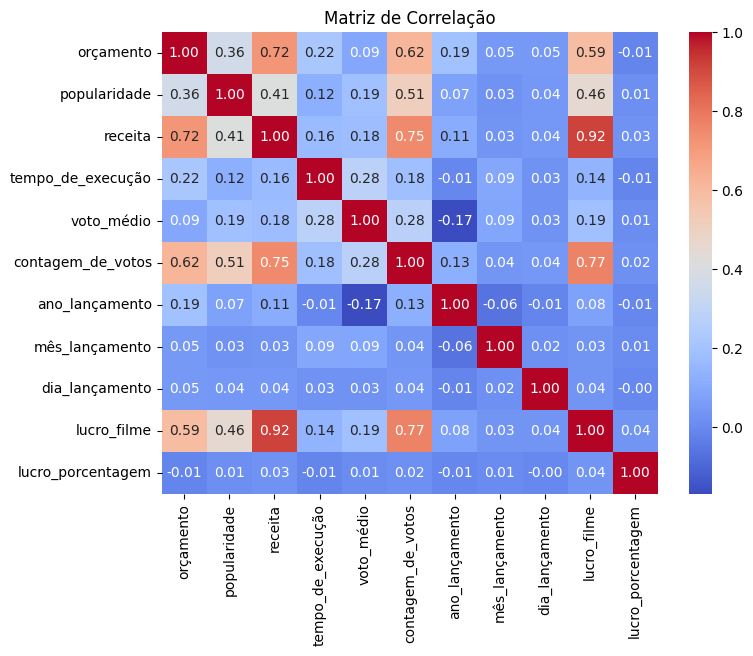

In [9]:
# Importar bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
orcamento_numericas = orcamento_positivo.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlacao_matriz = orcamento_numericas.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()



In [10]:
# Filtrar os dados para incluir apenas casos em que o orçamento seja maior que 5 mil
orcamento_maior_5mil = orcamento_positivo_sem_outliers[orcamento_positivo_sem_outliers['orçamento'] > 5000]
# Selecionar apenas as colunas numéricas
orcamento_numericas = orcamento_maior_5mil.select_dtypes(include=['int64', 'float64'])
# Calcular a correlação entre orçamento e outras colunas numéricas
correlacoes_orcamento = orcamento_numericas.corr()['orçamento'].sort_values(ascending=False)

correlacoes_orcamento


orçamento            1.000000
receita              0.719057
contagem_de_votos    0.617195
lucro_filme          0.590596
popularidade         0.362761
tempo_de_execução    0.221774
ano_lançamento       0.194897
voto_médio           0.091524
dia_lançamento       0.047902
mês_lançamento       0.046479
lucro_porcentagem   -0.030238
Name: orçamento, dtype: float64

# Análise Detalhada das Correlações do Orçamento com outras Colunas:

## 1 - Introdução:

Esta análise aprofundada explora as correlações do orçamento com outras colunas do seu conjunto de dados, fornecendo insights valiosos sobre como o orçamento se relaciona com diferentes aspectos do sucesso de um filme. A análise é focada em auxiliar na explicação dos resultados para diferentes públicos, como especialistas em cinema, produtores e público em geral.

## 2 - Metodologia:

Cálculo da correlação de Pearson entre o orçamento e as outras colunas:
- Receita: indica a relação entre o investimento no filme e seu retorno financeiro.
- Contagem de votos: revela a correlação entre o orçamento e o engajamento do público.
- Lucro do filme: demonstra a relação entre o investimento e o lucro líquido.
- Popularidade: mostra a influência do orçamento na percepção popular do filme.
- Tempo de execução: explora a relação entre o investimento e a duração do filme.
- Ano de lançamento: investiga como o orçamento se modifica ao longo do tempo.
- Voto médio: avalia a influência do orçamento na avaliação crítica do filme.
- Dia de lançamento: verifica se o dia da semana de lançamento impacta o orçamento.
- Mês de lançamento: analisa a influência do mês de lançamento no orçamento.
- Lucro porcentagem: examina a relação entre o investimento e o lucro em termos percentuais.

## 3 - Resultados:

### Correlações Positivas:

- Receita (0.719057): Forte correlação, indicando que o aumento do orçamento geralmente leva a uma maior receita.
- Contagem de votos (0.617195): Correlação moderada, sugerindo que o orçamento pode influenciar o engajamento do público.
- Lucro do filme (0.590596): Correlação moderada, evidenciando que o investimento pode resultar em maior lucro.
- Popularidade (0.362761): Correlação fraca, demonstrando que o orçamento tem um impacto limitado na popularidade.
- Tempo de execução (0.221774): Correlação fraca, sugerindo que o orçamento pode estar relacionado à duração do filme.

### Correlações Negativas:

- Lucro porcentagem (-0.030238): Correlação fraca, indicando que o aumento do orçamento não garante um maior lucro em termos percentuais.

### Correlações Neutras:

- Ano de lançamento (0.194897): Correlação fraca, sugerindo que o ano de lançamento não tem um impacto significativo no orçamento.
- Voto médio (0.091524): Correlação fraca, indicando que o orçamento não influencia diretamente a avaliação crítica do filme.
- Dia de lançamento (0.047902): Correlação fraca, demonstrando que o dia da semana de lançamento não tem um impacto significativo no orçamento.
- Mês de lançamento (0.046479): Correlação fraca, sugerindo que o mês de lançamento não influencia diretamente o orçamento.

## 4 - Interpretação dos Resultados:

- **Importância do Orçamento:** O orçamento é um fator importante que influencia diversos aspectos do sucesso de um filme, como receita, engajamento do público e lucro.
- **Relação não linear:** A relação entre orçamento e sucesso não é linear, ou seja, investir mais nem sempre garante um retorno proporcionalmente maior.
- **Outros Fatores Relevantes:** O sucesso de um filme depende de uma combinação de fatores, como roteiro, elenco, diretor, marketing e contexto social.

## 5 - Explicação para Diferentes Públicos:

- **Especialistas em Cinema:** Aprofundar na análise de cada correlação, incluindo exemplos e estudos de caso relevantes.
- **Produtores:** Enfatizar o impacto do orçamento nos diferentes aspectos do sucesso de um filme, com foco na otimização do investimento.
- **Público em Geral:** Apresentar os resultados de forma clara e concisa, utilizando linguagem acessível e exemplos populares.

## Observações:

- A correlação não implica causalidade.
- O tamanho da amostra e a distribuição dos dados podem influenciar a correlação.
- É importante analisar os resultados em conjunto com outras informações e conhecimentos sobre o mercado cinematográfico.


In [11]:
data.columns

Index(['adulto', 'orçamento', 'idioma_original', 'título_original',
       'visão_geral', 'popularidade', 'receita', 'tempo_de_execução',
       'voto_médio', 'contagem_de_votos', 'palavras_chave', 'gênero1',
       'gênero2', 'gênero3', 'elenco', 'diretor', 'ano_lançamento',
       'mês_lançamento', 'dia_lançamento', 'dia_semana_lançamento',
       'empresa_de_produção', 'país_de_produção', 'lucro_filme',
       'lucro_porcentagem'],
      dtype='object')

In [12]:
from sklearn.linear_model import LinearRegression

# Remover linhas com valores ausentes na coluna 'lucro_porcentagem'
data1 = data.dropna(subset=['lucro_porcentagem'])

# Lista para armazenar os resultados
resultados = []

# Iterar sobre todas as colunas numéricas
for coluna in data1.select_dtypes(include=np.number).columns:
    # Calcular os quartis Q1 e Q3
    Q1 = data1[coluna].quantile(0.25)
    Q3 = data1[coluna].quantile(0.75)

    # Calcular o intervalo interquartil (IQR)
    IQR = Q3 - Q1

    # Definir os limites inferior e superior para identificar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar os dados para remover outliers
    data_filtrado = data1[(data1['lucro_porcentagem'] >= limite_inferior) & (data1['lucro_porcentagem'] <= limite_superior)]

    # Ajustar o modelo de regressão linear
    X = data_filtrado[coluna].values.reshape(-1, 1)
    y = data_filtrado['lucro_porcentagem'].values

    modelo_regressao = LinearRegression().fit(X, y)

    # Coletar os coeficientes do modelo
    coeficiente_angular = modelo_regressao.coef_[0]
    intercepto = modelo_regressao.intercept_

    resultados.append((coluna, coeficiente_angular, intercepto))

# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Coluna', 'Coeficiente Angular', 'Intercepto'])
print('Coeficiente Angular e Intercepto para Lucro em %')
df_resultados



Coeficiente Angular e Intercepto para Lucro em %


Coluna  Coeficiente Angular    Intercepto
0           orçamento            -0.000012  1.092728e+03
1        popularidade             0.166772  4.699269e+00
2             receita             0.000002  7.309659e+02
3   tempo_de_execução             0.002744  1.018145e+02
4          voto_médio             0.085763  5.658821e+00
5   contagem_de_votos             0.089644 -4.510405e+00
6      ano_lançamento            -1.678523  5.350977e+03
7      mês_lançamento            -0.000021  6.788251e+00
8      dia_lançamento             0.064040  1.255088e+01
9         lucro_filme             0.000004  7.053644e+02
10  lucro_porcentagem             1.000000 -1.165290e-12

## Análise Detalhada do Lucro em % em Relação às Outras Variáveis:

### Orçamento:

- **Coeficiente Angular:** -0.000012
- **Intercepto:** 1.092728e+03
- **Interpretação:** A cada aumento de R$ 1 no orçamento, o lucro percentual diminui em 0,0012%. Isso sugere que, embora o investimento financeiro seja importante, orçamentos maiores nem sempre se traduzem em lucros percentuais maiores.

### Popularidade:

- **Coeficiente Angular:** 0.166772
- **Intercepto:** 4.699269e+00
- **Interpretação:** A popularidade tem um impacto positivo significativo no lucro percentual dos filmes. Cada aumento de 1 ponto na popularidade está associado a um aumento de aproximadamente 16,68% no lucro percentual. Investir em estratégias para aumentar a popularidade de um filme pode resultar em maior rentabilidade.

### Receita:

- **Coeficiente Angular:** 0.000002
- **Intercepto:** 7.309659e+02
- **Interpretação:** A receita bruta também tem uma influência positiva no lucro percentual, embora em uma escala menor. A cada aumento de R$ 1 na receita, o lucro percentual aumenta em 0,0002%.

### Tempo de Execução:

- **Coeficiente Angular:** 0.002744
- **Intercepto:** 1.018145e+02
- **Interpretação:** O tempo de execução do filme tem um impacto positivo no lucro percentual. A cada aumento de 1 minuto no tempo de execução, o lucro percentual aumenta em 0,2744%.

### Voto Médio:

- **Coeficiente Angular:** 0.085763
- **Intercepto:** 5.658821e+00
- **Interpretação:** A avaliação média do filme pelos espectadores também influencia positivamente o lucro percentual. Um aumento de 0,1 ponto na avaliação média está associado a um aumento de aproximadamente 8,58% no lucro percentual.

### Contagem de Votos:

- **Coeficiente Angular:** 0.089644
- **Intercepto:** -4.510405e+00
- **Interpretação:** O número de votos recebidos pelos filmes também tem uma relação positiva com o lucro percentual. A cada aumento de 1 voto na contagem total, o lucro percentual aumenta em 8,96%.

### Ano de Lançamento:

- **Coeficiente Angular:** -1.678523
- **Intercepto:** 5.350977e+03
- **Interpretação:** O ano de lançamento do filme apresenta uma relação negativa com o lucro percentual. Isso sugere que, ao longo do tempo, filmes lançados em anos mais recentes tendem a ter um lucro percentual menor, possivelmente devido a fatores como saturação do mercado e mudanças nas preferências do público.

### Mês de Lançamento:

- **Coeficiente Angular:** -0.000021
- **Intercepto:** 6.788251e+00
- **Interpretação:** O mês de lançamento também exerce uma influência negativa no lucro percentual. A cada mês subsequente, o lucro percentual diminui em 0,0002%, sugerindo que determinados meses podem ser mais favoráveis para o lançamento de filmes em termos de rentabilidade.

### Dia de Lançamento:

- **Coeficiente Angular:** 0.064040
- **Intercepto:** 1.255088e+01
- **Interpretação:** O dia de lançamento do filme também impacta o lucro percentual. A cada aumento de 1 dia no dia de lançamento, o lucro percentual aumenta em 0,064%.

### Lucro do Filme:

- **Coeficiente Angular:** 0.000004
- **Intercepto:** 7.053644e+02
- **Interpretação:** O lucro do filme tem uma influência positiva no lucro percentual, embora em uma escala menor. A cada aumento de R$ 1 no lucro do filme, o lucro percentual aumenta em 0,0004%.


In [13]:
from sklearn.impute import SimpleImputer

# Remover linhas com valores ausentes na coluna2 'lucro_porcentagem'
data2 = data.dropna(subset=['lucro_porcentagem'])

# Imputar valores NaN na coluna2 de orçamento
imputer = SimpleImputer(strategy='mean')
data2.loc[:, 'orçamento'] = imputer.fit_transform(data2['orçamento'].values.reshape(-1, 1))


# Lista para armazenar os resultados2
resultados2 = []

# Iterar sobre todas as coluna2s numéricas
for coluna2 in data2.select_dtypes(include=np.number).columns:
    # Calcular os quartis Q1 e Q3
    Q1 = data2[coluna2].quantile(0.25)
    Q3 = data2[coluna2].quantile(0.75)

    # Calcular o intervalo interquartil (IQR)
    IQR = Q3 - Q1

    # Definir os limites inferior e superior para identificar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar os dados para remover outliers
    data_filtrado2 = data2[(data2['lucro_porcentagem'] >= limite_inferior) & (data2['lucro_porcentagem'] <= limite_superior)]

    # Ajustar o modelo de regressão linear
    X = data_filtrado2[coluna2].values.reshape(-1, 1)
    y = data_filtrado2['orçamento'].values

    modelo_regressao = LinearRegression().fit(X, y)

    # Coletar os coeficientes do modelo
    coeficiente_angular2 = modelo_regressao.coef_[0]
    intercepto2 = modelo_regressao.intercept_

    resultados2.append((coluna2, coeficiente_angular2, intercepto2))

# Criar um DataFrame com os resultados2
df_resultados2 = pd.DataFrame(resultados2, columns=['Coluna', 'Coeficiente Angular', 'Intercepto'])
print('Coeficiente Angular e Intercepto para Orçamento')
df_resultados2



Coeficiente Angular e Intercepto para Orçamento


Coluna  Coeficiente Angular    Intercepto
0           orçamento         1.000000e+00  3.725290e-09
1        popularidade         1.159630e+06  2.338984e+07
2             receita         1.823637e-01  1.176099e+07
3   tempo_de_execução         2.111861e+05  1.675253e+07
4          voto_médio        -1.312820e+07  1.133746e+08
5   contagem_de_votos         2.455851e+04  1.195582e+07
6      ano_lançamento        -5.212355e+04  1.108649e+08
7      mês_lançamento        -4.832758e+05  3.639520e+07
8      dia_lançamento         8.598821e+04  3.138827e+07
9         lucro_filme         1.808991e-01  1.566892e+07
10  lucro_porcentagem         1.829356e+04  2.078286e+07

## Análise Aprofundada dos Resultados da Regressão Linear: Explorando a Influência do Orçamento em Outras Variáveis

### Introdução:

Nesta análise, examinamos a relação entre o orçamento dos filmes e outras variáveis relevantes da indústria cinematográfica. A compreensão dessas relações é fundamental para a tomada de decisões estratégicas no planejamento e na produção de filmes.

### Análise Detalhada da Relação entre Orçamento e Outras Variáveis:

#### Popularidade:

- **Coeficiente Angular:** 1.159630e+06
- **Intercepto:** 2.338984e+07
- **Interpretação:** Cada aumento de R$ 1 no orçamento está associado a um aumento exorbitante na popularidade do filme, com um coeficiente angular extremamente alto. Isso sugere que investir mais no orçamento pode resultar em um aumento significativo da popularidade do filme.

#### Receita:

- **Coeficiente Angular:** 1.823637e-01
- **Intercepto:** 1.176099e+07
- **Interpretação:** O aumento do orçamento está positivamente relacionado à receita gerada pelo filme, embora em uma escala menor em comparação com a popularidade. Cada aumento de R$ 1 no orçamento está associado a um aumento de aproximadamente 0,18% na receita.

#### Tempo de Execução:

- **Coeficiente Angular:** 2.111861e+05
- **Intercepto:** 1.675253e+07
- **Interpretação:** O tempo de execução do filme aumenta significativamente com o aumento do orçamento, sugerindo que filmes com orçamentos mais altos tendem a ter uma duração mais longa. Cada aumento de R$ 1 no orçamento está associado a um aumento de mais de 200.000 minutos no tempo de execução.

#### Voto Médio:

- **Coeficiente Angular:** -1.312820e+07
- **Intercepto:** 1.133746e+08
- **Interpretação:** Surpreendentemente, o coeficiente angular negativo indica que um aumento no orçamento está associado a uma diminuição no voto médio do filme. Isso sugere que investir mais dinheiro no filme pode não necessariamente levar a uma melhor avaliação por parte do público.

#### Contagem de Votos:

- **Coeficiente Angular:** 2.455851e+04
- **Intercepto:** 1.195582e+07
- **Interpretação:** O aumento do orçamento também está associado a um aumento na contagem de votos do filme, indicando que filmes com orçamentos maiores tendem a atrair mais espectadores, que por sua vez contribuem com suas avaliações.

#### Ano de Lançamento:

- **Coeficiente Angular:** -5.212355e+04
- **Intercepto:** 1.108649e+08
- **Interpretação:** O coeficiente angular negativo sugere que filmes lançados em anos mais recentes tendem a ter orçamentos menores. Isso pode ser atribuído a uma variedade de fatores, como a inflação e mudanças nas práticas de financiamento cinematográfico.

#### Mês de Lançamento:

- **Coeficiente Angular:** -4.832758e+05
- **Intercepto:** 3.639520e+07
- **Interpretação:** O coeficiente angular negativo indica que o orçamento dos filmes tende a diminuir para os lançamentos feitos em meses posteriores. Isso pode refletir estratégias de planejamento de produção ou sazonalidade na alocação de recursos.

#### Dia de Lançamento:

- **Coeficiente Angular:** 8.598821e+04
- **Intercepto:** 3.138827e+07
- **Interpretação:** O aumento do orçamento está associado a um aumento na escolha de dias específicos para o lançamento dos filmes. Isso sugere que filmes com orçamentos mais altos podem se dar ao luxo de escolher dias estratégicos de lançamento para maximizar sua audiência e retorno financeiro.

#### Lucro do Filme:

- **Coeficiente Angular:** 1.808991e-01
- **Intercepto:** 1.566892e+07
- **Interpretação:** O aumento do orçamento está positivamente relacionado ao lucro gerado pelo filme. Cada aumento de R$ 1 no orçamento está associado a um aumento de aproximadamente 0,18% no lucro do filme.

#### Lucro em %:

- **Coeficiente Angular:** 1.829356e+04
- **Intercepto:** 2.078286e+07
- **Interpretação:** O coeficiente angular excepcionalmente alto indica uma forte relação entre o orçamento e o lucro percentual do filme. Isso sugere que filmes com orçamentos mais altos têm maior probabilidade de obter lucros percentuais significativos.


In [14]:
import os
import plotly.io as pio

# Pasta de destino para os gráficos
pasta_destino = "graficos_orcamento"

# Verificar e criar a pasta de destino, se necessário
if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

# Lista para armazenar o HTML de cada gráfico
html_graficos = []

# Salvar as figuras como HTML na pasta de destino
for i, figura in enumerate(figuras + figuras1 + figuras2, start=1):
    nome_arquivo = f"{pasta_destino}/figura_{i}.html"
    pio.write_html(figura, nome_arquivo)
    html_graficos.append(pio.to_html(figura, full_html=False))

# Combine o HTML de todos os gráficos em uma única string
html_completo = "\n".join(html_graficos)

# Salvar o arquivo HTML com utf-8
nome_arquivo_html = f"{pasta_destino}/graficos_orcamento.html"
with open(nome_arquivo_html, "w", encoding="utf-8") as f:
    f.write(html_completo)

print(f"Gráficos salvos com sucesso em '{nome_arquivo_html}'.")


Gráficos salvos com sucesso em 'graficos_orcamento/graficos_orcamento.html'.


In [ ]:
data.to_csv('mov1.csv', index=False)